In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\anush\\Downloads')

In [5]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [7]:
print('The data has',df.shape[0],'rows and',df.shape[1],'columns')

The data has 3900 rows and 18 columns


# EDA

## Checking column names and data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

## Correcting column name formatting

In [31]:
df = df.rename(columns={'Customer ID':'Customer_ID','Item Purchased':'Item_Purchased','Purchase Amount (USD)':'Purchase_Amount','Review Rating':'Review_Rating','Subscription Status':'Subscription_Status','Shipping Type':'Shipping_Type','Discount Applied':'Discount_Applied','Promo Code Used':'Promo_Code_Used','Previous Purchases':'Previous_Purchases','Payment Method':'Payment_Method','Frequency of Purchases':'Frequency_of_Purchases'})

## 5 point summary

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase_Amount,3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review_Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


## Checking missing values

In [33]:
df.isnull().sum()

Customer_ID               0
Age                       0
Gender                    0
Item_Purchased            0
Category                  0
Purchase_Amount           0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Subscription_Status       0
Shipping_Type             0
Discount_Applied          0
Promo_Code_Used           0
Previous_Purchases        0
Payment_Method            0
Frequency_of_Purchases    0
dtype: int64

### The data does not have any missing values

## Checking duplicates

In [34]:
df.duplicated().sum()

0

### The data has no duplicate values

## Outliers checking

In [35]:
cont_df= df.select_dtypes(include='number')

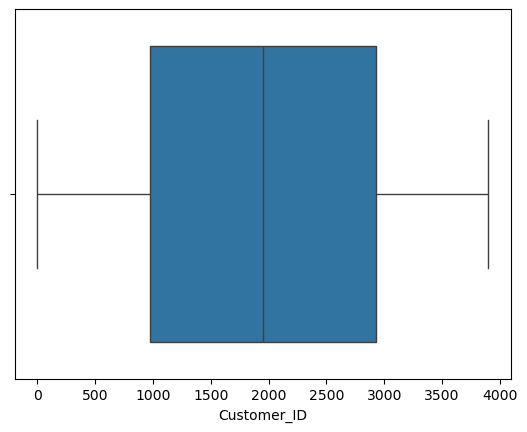

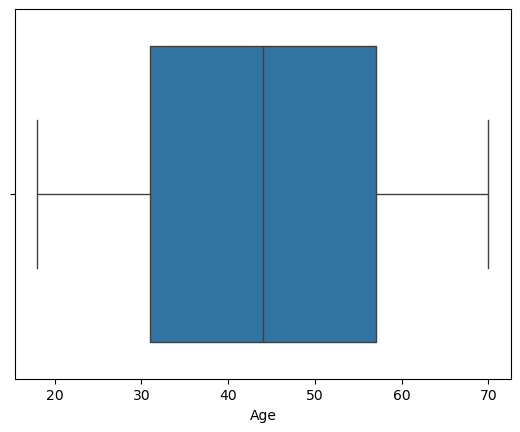

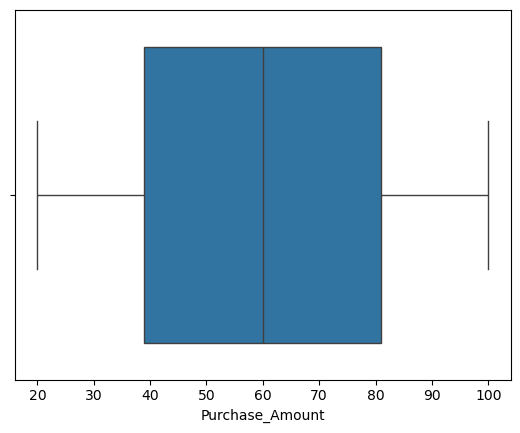

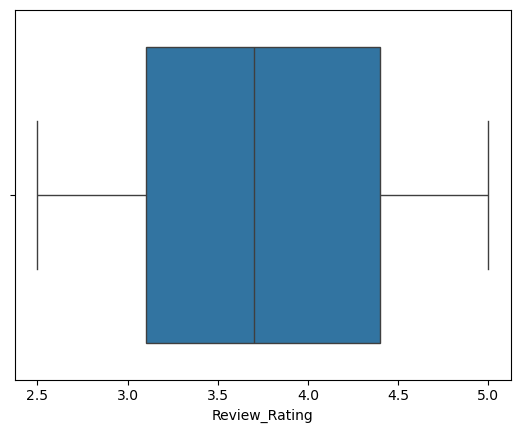

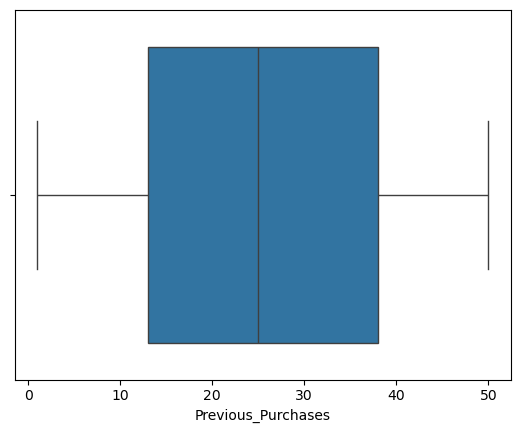

In [36]:
for i in cont_df.columns:
    sns.boxplot(data=cont_df,x=i)
    plt.show()

### There are no outliers in the dataset

## Checking discrepancies in categorical columns

In [37]:
cat_df = df.select_dtypes(include='object')

In [38]:
for i in cat_df.columns:
    print('\n')
    print(i)
    print('\n')
    print(cat_df[i].value_counts())



Gender


Gender
Male      2652
Female    1248
Name: count, dtype: int64


Item_Purchased


Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


Category


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


Location


Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana     

## Customer Demographics

What is the age distribution of customers?  Histogram, Boxplot, KDE

In [39]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

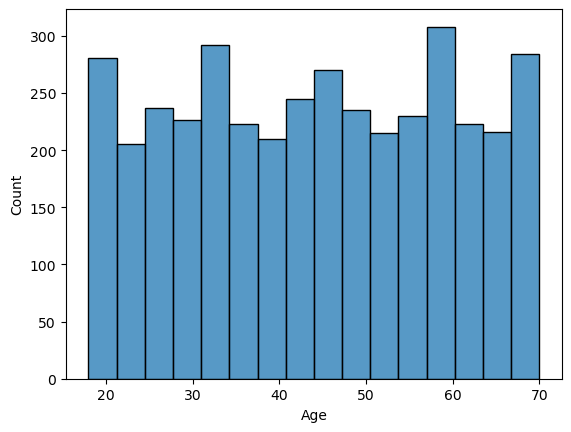

In [40]:
sns.histplot(data=df,x='Age')
plt.show()

Is there a significant difference in spending (Purchase Amount) between genders?   Boxplot / Violin plot / Bar chart

In [42]:
grouped_df = df.groupby(by='Gender')[['Purchase_Amount']].sum()
grouped_df

,Purchase_Amount
Gender,
Female,75191
Male,157890


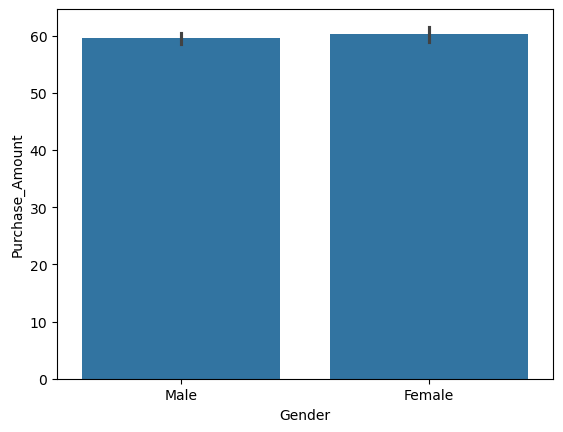

In [46]:
sns.barplot(data=df,x='Gender',y='Purchase_Amount')
plt.show()

Which states/locations have the highest number of purchases? Bar chart (Top-N locations) Bar chart

In [52]:
Purchase_by_location = df.groupby(by='Location')[['Purchase_Amount']].sum().sort_values(by='Purchase_Amount',ascending=False).head(10)
Purchase_by_location

,Purchase_Amount
Location,
Montana,5784
Illinois,5617
California,5605
Idaho,5587
Nevada,5514
Alabama,5261
New York,5257
North Dakota,5220
West Virginia,5174


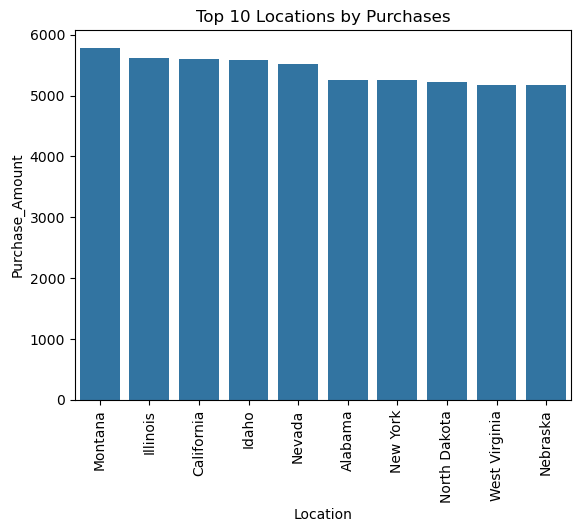

In [59]:
sns.barplot(data=Purchase_by_location,x='Location',y='Purchase_Amount')
plt.title('Top 10 Locations by Purchases')
plt.xticks(rotation=90)
plt.show()

## Purchase Behavior
### What are the top 5 most purchased items and categories? Boxplot / Bar chart

In [73]:
df[['Category','Purchase_Amount']].groupby(by='Category').sum().sort_values(by='Purchase_Amount',ascending=False)

,Purchase_Amount
Category,
Clothing,104264
Accessories,74200
Footwear,36093
Outerwear,18524


In [75]:
df[['Item_Purchased','Purchase_Amount']].groupby(by='Item_Purchased').sum().sort_values(by='Purchase_Amount',ascending=False).head(5)

,Purchase_Amount
Item_Purchased,
Blouse,10410
Shirt,10332
Dress,10320
Pants,10090
Jewelry,10010


In [ ]:
How does the purchase amount vary across different seasons? Bar chart / Boxplot

In [63]:
df.groupby(by='Season')[['Purchase_Amount']].sum()

,Purchase_Amount
Season,
Fall,60018
Spring,58679
Summer,55777
Winter,58607


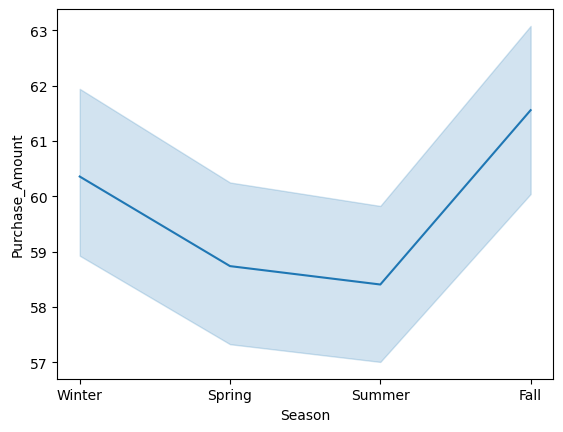

In [67]:
sns.lineplot(data=df,x='Season',y='Purchase_Amount')
plt.show()

Do customers with subscriptions spend more than non-subscribers? 

In [69]:
df.groupby(by='Subscription_Status')[['Purchase_Amount']].sum()

,Purchase_Amount
Subscription_Status,
No,170436
Yes,62645


### No, Non-subscribers are spending significantly more than subscribers

## Discounts & Payments
Does applying a discount or using a promo code significantly increase purchase amount?

In [70]:
df[['Discount_Applied','Purchase_Amount']].groupby('Discount_Applied').sum()

,Purchase_Amount
Discount_Applied,
No,133670
Yes,99411


In [71]:
df[['Promo_Code_Used','Purchase_Amount']].groupby(by='Promo_Code_Used').sum()

,Purchase_Amount
Promo_Code_Used,
No,133670
Yes,99411


### We can see applying discounts or promocodes leads to higher purchases

### What are the most preferred payment methods, and do they relate to higher purchase values?

In [85]:
df[['Payment_Method','Purchase_Amount']].groupby(by='Payment_Method').agg({'Payment_Method':'count','Purchase_Amount':'sum'}).rename(columns={'Payment_Method':'Count_of_Payment_Method','Purchase_Amount':'Purchases'}).sort_values(by='Count_of_Payment_Method',ascending=False)

,Count_of_Payment_Method,Purchases
Payment_Method,,
PayPal,677,40109
Credit Card,671,40310
Cash,670,40002
Debit Card,636,38742
Venmo,634,37374
Bank Transfer,612,36544


## Customer Loyalty & Frequency
### How do previous purchases relate to frequency of purchases? (loyalty patterns)

In [86]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

In [90]:
df.groupby(by='Frequency_of_Purchases')[['Previous_Purchases']].sum().sort_values(by='Previous_Purchases',ascending=False)

,Previous_Purchases
Frequency_of_Purchases,
Quarterly,15119
Every 3 Months,14577
Annually,14049
Monthly,13979
Weekly,13891
Fortnightly,13697
Bi-Weekly,13559


### Is there a correlation between review rating and purchase amount or frequency? Scatter plot / Regression plot / Heatmap

In [93]:
corr_df = df[['Review_Rating','Purchase_Amount']].corr()
corr_df

,Review_Rating,Purchase_Amount
Review_Rating,1.000000,0.030776
Purchase_Amount,0.030776,1.000000


<Axes: >

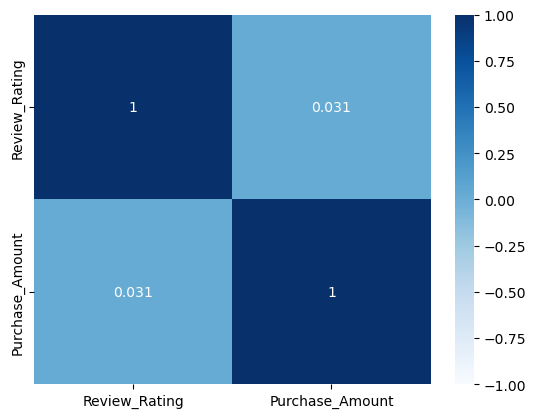

In [97]:
sns.heatmap(data=corr_df,annot=True,vmin=-1,vmax=1,cmap='Blues')

There is a weak positive correlation between Review ratings and purchase amount i.e. purchase increase slightly with increase in ratings.

## Customer Segmentation
### Are there distinct age groups that prefer certain product categories (e.g., clothing vs footwear)?

In [139]:
df['Age_Group']=np.where(df.Age < 30,'Young_Gen',np.where(df.Age < 50,'Middle_Gen','Older_Gen'))
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount,Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases,Age_Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Older_Gen
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young_Gen
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Older_Gen
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young_Gen
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle_Gen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Middle_Gen
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Older_Gen
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Middle_Gen
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Middle_Gen


In [140]:
pd.crosstab(index=df.Age_Group,columns=df.Category)

Category,Accessories,Clothing,Footwear,Outerwear
Age_Group,,,,
Middle_Gen,472,648,220,123
Older_Gen,493,685,252,129
Young_Gen,275,404,127,72


Clothing is most preferred category among all generations 

### Does purchase frequency vary significantly across genders?

In [116]:
pd.crosstab(index=df.Frequency_of_Purchases,columns=df.Gender)

Gender,Female,Male
Frequency_of_Purchases,,
Annually,185,387
Bi-Weekly,188,359
Every 3 Months,186,398
Fortnightly,163,379
Monthly,185,368
Quarterly,169,394
Weekly,172,367


### Which combination of size and color is most popular?

In [119]:
df[['Size','Color','Purchase_Amount']].groupby(by=['Size','Color']).sum().sort_values(by='Purchase_Amount',ascending=False)

Purchase_Amount
Size Color                    
M    Violet               5449
     Olive                5121
     Gray                 5090
     Charcoal             4661
     White                4585
...                        ...
XL   Silver                760
     Indigo                737
     Maroon                721
     Gold                  688
     Blue                  456

[100 rows x 1 columns]